QUESTION 1

In [1]:
import numpy as np
import scipy.stats

# Ho: The population mean energy intake = 7725KJ
# H1: The population mean energy intake ≠ 7725KJ

# Since we are looking for deviation from Ho, we assume a two-tailed test
energy_intake = [5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770]
energy_intake = np.array(energy_intake)# Conversion of a list to a numpy array

u = 7725 # recommended energy intake value
sample_mean = np.mean(energy_intake)
sample_std = np.std(energy_intake, ddof=1) #ddof = 1
std_errMean = sample_std/np.sqrt(energy_intake.size)

df = energy_intake.size - 1 # degree of freedom
t = (sample_mean - u)/std_errMean # calculation of t-statistic

p = scipy.stats.t.sf(abs(t), df=df)*2
alpha = 0.05 # significance level

if p < alpha:
    print("Null Hypothesis Rejected")
    print(f"The sample mean is: {sample_mean}")
    print(f"The sample stamdard deviation is: {sample_std}")
    print(f"The standard error of the mean is: {std_errMean}")
    print(f"The t statistic is: {t}")
    print(f"The degrees of freedom is: {df}")
    print(f"The p value to 4 decimal places is: {round(p,4)}")
else:
    print("Null Hypothesis Accepted")
    print(f"The sample mean is: {sample_mean}")
    print(f"The sample stamdard deviation is: {sample_std}")
    print(f"The standard error of the mean is: {std_errMean}")
    print(f"The t statistic is: {t}")
    print(f"The degrees of freedom is: {df}")
    print(f"The p value to 4 decimal places is: {round(p,4)}")

Null Hypothesis Rejected
The sample mean is: 6753.636363636364
The sample stamdard deviation is: 1142.1232221373727
The standard error of the mean is: 344.3631083801271
The t statistic is: -2.8207540608310198
The degrees of freedom is: 10
The p value to 4 decimal places is: 0.0181


QUESTION 2

In [46]:
import numpy as np
import scipy.stats
# Ho: Guinness served in an Irish pub tastes the same as pints served elsewhere around the globe
# H1: Guinness served in an Irish pub tastes significantly better than pints served elsewhere around the globe

ire_mean = 74 # Mean GOES score in Ireland
ire_std = 7.4 # Standard deviation of GOES score in Ireland
ire_n = 42 # Sample size of data from Ireland

else_mean = 57 # Mean GOES score Elsewhere
else_std = 7.1 # Standard deviation of GOES score Elsewhere
else_n = 61  # Sample size of data from Elsewhere


# For this problem, a two-sampled test will be appropriate. Two-sampled tests are used
# compare the population means from two different groups.

# ASSUMPTIONS: 
# 1. Data from both groups are independent
# 2. Both groups are assumed to have equal variances

df =  ire_n + else_n - 2 # degree of freedom for a two-sample test
alpha = 0.05 # significance level
sp_var = (((ire_n-1)*(ire_std**2)) + ((else_n-1)*(else_std**2)))/df # pooled standard deviation
sp=np.sqrt(sp_var)

t = (ire_mean - else_mean)/(sp*np.sqrt((1/ire_n)+(1/else_n)))


# Now, based on our Hypothesis, we use a one-tailed test since we are interested
# in if a Guinness from the Irish pub tastes better than that elsewhere 

p = scipy.stats.t.sf(abs(t), df=df) # one-tailed test to get p value

if p < alpha:
    print("Null Hypothesis Rejected: Guinness in Ireland tastes better than everywhere else")
    print(f"The t statistic to 2 decimal places is: {round(t,2)}")
    print(f"The p value to 3 decimal places is: {p}")
else:
    print("Null Hypothesis Accepted: Guinness in Ireland does not significantly taste better than everywhere else.")
    print(f"The t statistic to 2 decimal places is: {round(t,2)}")
    print(f"The p value to 3 decimal places is: {p}")

Null Hypothesis Rejected: Guinness in Ireland tastes better than everywhere else
The t statistic to 2 decimal places is: 11.74
The p value to 3 decimal places is: 6.979768077580737e-21


QUESTION 3

The correlation coefficient for the datasets in 2013 is approximately: -0.5255


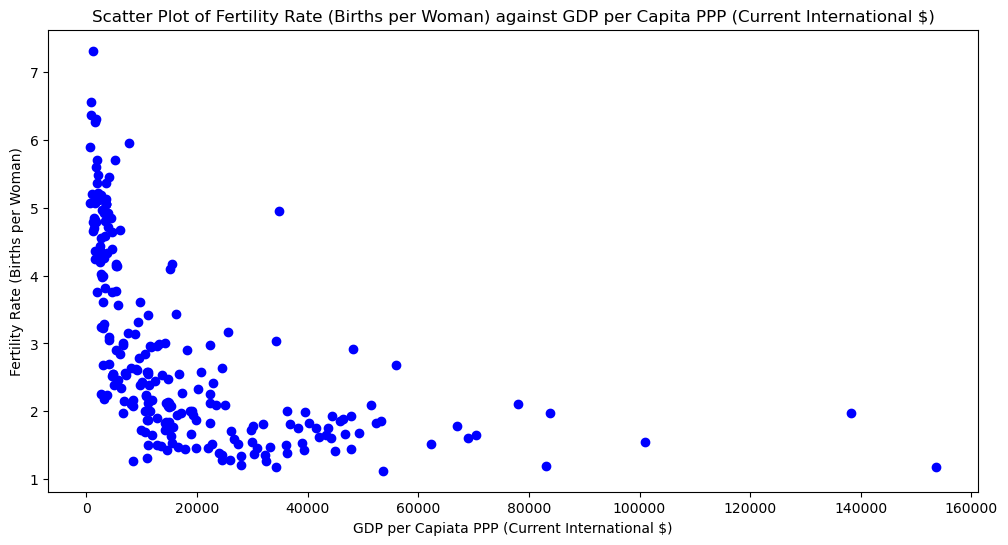

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importation and Cleanup of Data Files
fertility = pd.read_excel("API_SP.DYN.TFRT.IN_DS2_en_excel_v2_4521929.xls", sheet_name='Data', skiprows=range(1,3))
fertility.columns = fertility.loc[0,:] # Resetting name of columns
fertility.columns.name = "" # Resetting column row name
fertility = fertility.drop(0) # removal of unnecessary row
fertility.index = np.arange(len(fertility)) # reindexing the rows
fertility_data = fertility.loc[:, 2013] # fertility data values for 2013


gdp = pd.read_excel("API_NY.GDP.PCAP.PP.CD_DS2_en_excel_v2_4546474.xls", sheet_name = 'Data', skiprows=range(1,3))
gdp.columns = gdp.loc[0,:] # Resetting name of columns
gdp.columns.name = "" # Resetting column row name
gdp = gdp.drop(0) # removal of unnecessary row
gdp.index = np.arange(len(gdp)) # reindexing the rows
gdp_data = gdp.loc[:, 2013] # gdp data values for 2013


# GRAPH PLOT of Fertility against GDP per Capita PPP ($ international)

fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("Scatter Plot of Fertility Rate (Births per Woman) against GDP per Capita PPP (Current International $)")
ax.set_xlabel("GDP per Capiata PPP (Current International $)")
ax.set_ylabel("Fertility Rate (Births per Woman)")

ax.scatter(gdp_data, fertility_data, color='b')

#Finding the Correlation of our Data
corr_coeff = gdp_data.corr(fertility_data, method='pearson')

print(f"The correlation coefficient for the datasets in 2013 is approximately: {round(corr_coeff,4)}")

QUESTION 4

The annualized return for house prices is approximately 5.3542%


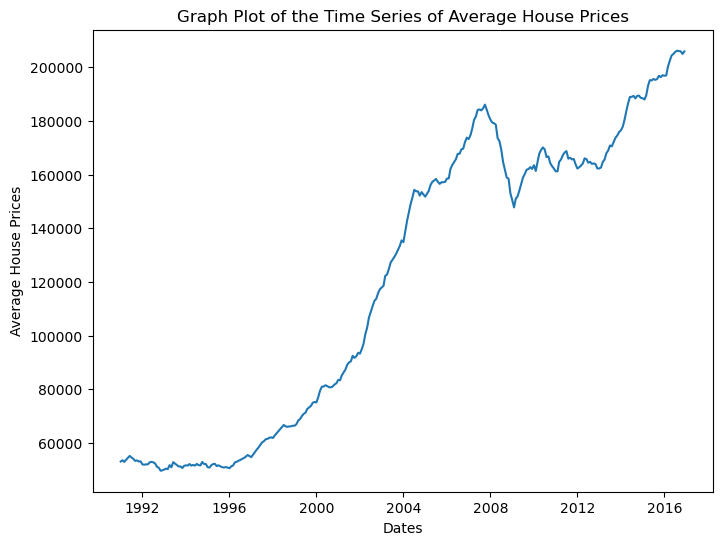

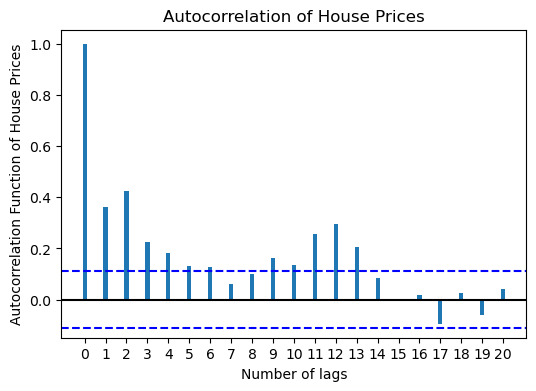

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

# Importation of data
house_price = pd.read_excel("Monthly Average House Price.xls")
house_price.index = house_price.iloc[:,0] # reindexing our house prices
house_price = house_price.drop('Unnamed: 0', axis=1) # deleting an unnecesary column
house_price.index.name = "" # removing the name for the index column

house_price = house_price.loc[:'12-1-2016','Average House Price'] # filtering data from 1991 to 2016

# Graph Plot of the Time Series of the Monthly Prices
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(house_price.index, house_price)

ax.set_title("Graph Plot of the Time Series of Average House Prices")
ax.set_xlabel("Dates")
ax.set_ylabel("Average House Prices")

houseprice_list = house_price.tolist()

# monthly returns function

def monthly_ret(sample):
    """
        This function calculates the monthly returns
    """
    stored = sample.copy()
    result = sample.copy()
    for i in range(len(sample)):
        b = i -1
        if b<0:
            result[0] = float("Nan")
        else:
            result[i]= (stored[i]/stored[i-1])-1
    return result

mnth_return = monthly_ret(house_price) # monthly returns
acorr = sm.tsa.acf(mnth_return[1:], nlags = 20) #  We index monthly return from 1 because it has a nan value at the top
x_values = list(range(0, len(acorr)))

# Graph Plot of the Autocorrelation Function
fig, bx = plt.subplots(1,1, figsize=(6,4))
bx.set_title("Autocorrelation of House Prices")
bx.bar(x_values,acorr, width=0.2)
bx.xaxis.set_ticks(np.arange(0, 21, 1))
bx.set_xlabel("Number of lags")
bx.set_ylabel("Autocorrelation Function of House Prices")


# Critical values for ACF
p_positive = 1.96/np.sqrt(len(mnth_return)-1) # We minus 1 because we have a Nan value
p_negative = -1.96/np.sqrt(len(mnth_return)-1) # We minus 1 because of the Nan value in mnth_return

bx.axhline(0, linestyle = '-', color = 'k')
bx.axhline(p_positive, linestyle='--', color='b')
bx.axhline(p_negative, linestyle = '--', color = 'b')

# Function definition for the annual return
def annual_return(price_list):
    total_return = (price_list[-1]-price_list[0])/price_list[0]
    n = len(price_list)
    annualized_return = ((1+total_return)**(12/n))-1
    return annualized_return*100
    

ann_ret = annual_return(house_price)
print(f"The annualized return for house prices is approximately {round(ann_ret,4)}%")

QUESTION 5

The annualized return for FTSE100 is approximately 4.4625%


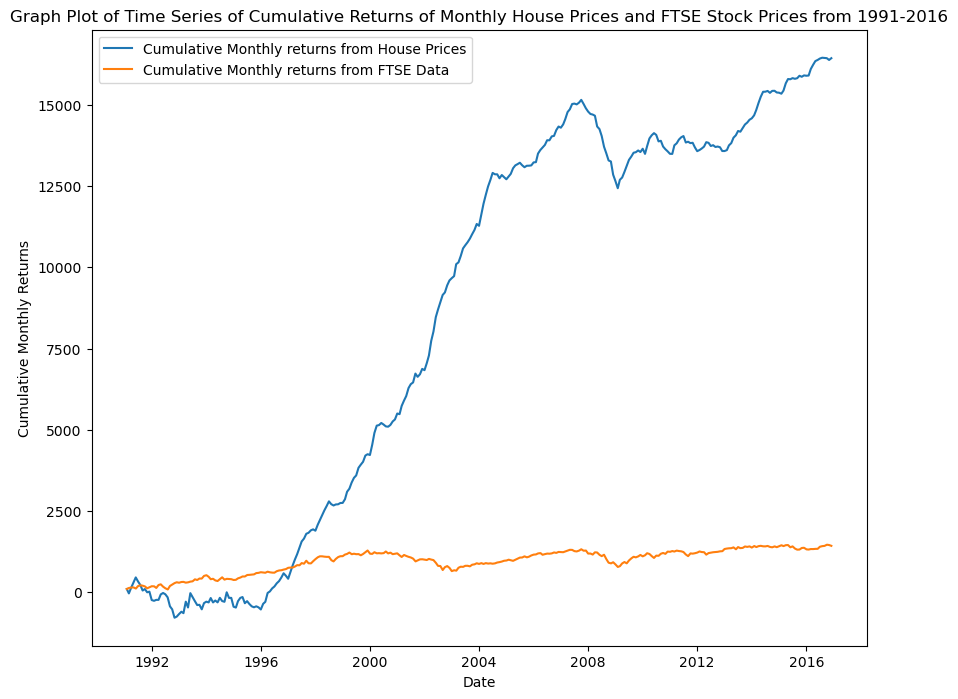

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importation of Data Files
ftse = pd.read_csv("FTSE100.csv")

# Data Cleanup and Rearrangement
ftse = ftse.iloc[::-1] # Reversing the FTSE dataframe
ftse.index = ftse.iloc[:,0]
ftse = ftse.drop('Date', axis=1) # Setting index of the dataframe to date
ftse.index = pd.DatetimeIndex(ftse.index) # Converting the index of FTSE to a datetime index

# Importation of House Price Data
house_price = pd.read_excel("Monthly Average House Price.xls")
house_price.index = house_price.iloc[:,0] # reindexing our house prices
house_price = house_price.drop('Unnamed: 0', axis=1) # deleting an unnecesary column
house_price.index.name = "" # removing the name for the index column

house_price = house_price.loc[:'12-1-2016','Average House Price'] # filtering data from 1991 to 2016


# Monthly returns function
def monthly_ret(sample):
    """
        This function calculates the monthly returns
    """
    stored = sample.copy()
    result = sample.copy()
    for i in range(len(sample)):
        b = i -1
        if b<0:
            result[0] = float("Nan")
        else:
            result[i]= (stored[i]/stored[i-1])-1
    return result

# Cumulative sum function
def cumsum(sample_data):
    result = sample_data.copy()
    stored = sample_data.copy()
    for i in range(len(sample_data)):
        b = i-1
        if (b == -1) or (b==0):
            continue
        else:
            result[i] = result[i] + result[i-1]
    return result

mnth_return = monthly_ret(house_price)
cum_mnth = cumsum(mnth_return) # cumulative of monthly returns from previous cell
cum_ftse = cumsum(monthly_ret(ftse['Adj Close'])) # cunmulative of monthly returns of ftse data

# Normalizing the cumulative price data from previous Cell
mnth_norm = cum_mnth*100/cum_mnth[1]

# Normalizing ftse data
ftse_norm = cum_ftse*100/cum_ftse[1]

# Graph plot of cumulative monthly returns
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.set_title("Graph Plot of Time Series of Cumulative Returns of Monthly House Prices and FTSE Stock Prices from 1991-2016")
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative Monthly Returns")
ax.plot(mnth_norm.index, mnth_norm, label="Cumulative Monthly returns from House Prices")
ax.plot(ftse_norm.index, ftse_norm, label="Cumulative Monthly returns from FTSE Data")
ax.legend(loc='best')

# Function definition for the annualized return
def annual_return(price_list):
    total_return = (price_list[-1]-price_list[0])/price_list[0] # total return 
    n = len(price_list) # length of dataset
    annualized_return = ((1+total_return)**(12/n))-1
    return annualized_return*100

ftseann_ret = annual_return(ftse['Adj Close']) # annualized return for FTSE100
print(f"The annualized return for FTSE100 is approximately {round(ftseann_ret,4)}%")
